# Linear Regression Models for Asset Pricing

In this notebook, I use the CAPM theory to price the General Electric (GE) stock. 

I will do that int he following steps: 
* Use a simple regression to estimate the relationship GE's excess return and the market portfolio's excess return (SP500 will be used as proxy for market portfolio)
* Run a regresion diagnostic and revisit the assumptions if necessary 
* Plot GE's actuall excess return on the revisted regression line. If it is above, then AAPL is underpriced. If it is below, then AAPL is overpriced. 

In this notebook, I used the following sources:
* Case study: https://ocw.mit.edu/courses/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/resources/mit18_s096f13_casestudy1/
* Thoertical background for regression analysis: https://online.stat.psu.edu/stat462/node/87/
* Diagnostic analysis: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/


## Table of Contents:<a class="anchor" id="t-o-c"></a>
* [CAPM Theory](#CAPM-theory)
* [Historical Data](#hist-data)
* [Fitting the Regression Model](#fit-reg)
* [Interpreting the OLS Regression Results](#int-res)

## [1 CAPM Theory](#t-o-c)
<a class="anchor" id="CAPM-Theory"></a>


* Developed by Sharpe (1964) and Lintner (1965)
* Underlying assumptions about investors
    - They have the same expections
    - They hold portfolios of risky assets that are mean-variance efficient (expected return vs risk expressed as variance)
    - They can borrow and lend money freely at the same risk-free rate
 


In such a market, the expected return of asset j is: 

$$ E[R_j] = R_{risk free} + \beta_j(E[R_{Market}] - R_{risk free}) $$ 
 <br> where $\beta_j = Cov[R_j, R_{Market}]/Var[R_{Market}]$ <br> <br>
 and $R_{Market}$ is the return on the market portfolio and $R_{risk free}$ is the return on the risk-free asset.

**Task**: Consider fitting the simple linear regression model of a stock's daily excess return on the market-portfolio daily excess return, using the S&P 500 index as the proxy for the market return and the 3-month Treasury constant maturity rate as the risk-free rate. THe linear model is given by:
<br><br>
$$ R^{*}_{j,t} = \alpha_j + \beta_jR^{*}_{Market} + \epsilon_{j}, t = 1,2,...$$
<br><br>
where $\epsilon_{j,t}$ are white noise: $W \rightarrow N(0,\sigma^2)$

Under the assumptions of the CAPM, the regression parmaeters $(\alpha_j,\beta_j)$ are such that $\beta_j$ is the same as in the CAPM model, and $\alpha_j$ is zero

## [2 Historical data](#t-o-c) 
<a class="anchor" id="hist-data"></a>

Let us consider General Electric as the asset considered against SP500 as proxy for Market. 

In [351]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [343]:
start = '2000-01-03'
end = '2013-05-31'
df_GE = yf.download('GE', start = start, end = end)
df_SP500 = yf.download('^GSPC', start = start, end = end)
df_Treasury = yf.download('^IRX', start = start, end = end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [344]:
df_GE.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-05-23 00:00:00-04:00,141.235809,142.616943,140.815475,142.076508,116.231850,7391201
2013-05-24 00:00:00-04:00,141.115707,142.136551,141.055664,141.295868,115.593201,6830261
2013-05-28 00:00:00-04:00,142.737045,143.157394,141.596115,141.716202,115.937111,7880699
2013-05-29 00:00:00-04:00,140.635315,142.316696,140.515228,141.956406,116.133560,6534054
2013-05-30 00:00:00-04:00,141.596115,142.677002,141.115707,141.716202,115.937111,4887173


In [345]:
np.round(33.4, -1)

30.0

C:\Users\basha\AppData\Local\Temp\ipykernel_10600\1923918744.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.set_yticks([i for i in range(np.int(np.round(df_GE['Adj Close'].min(),-1)), np.int(np.round(df_GE['Adj Close'].max(),-1)),40)])


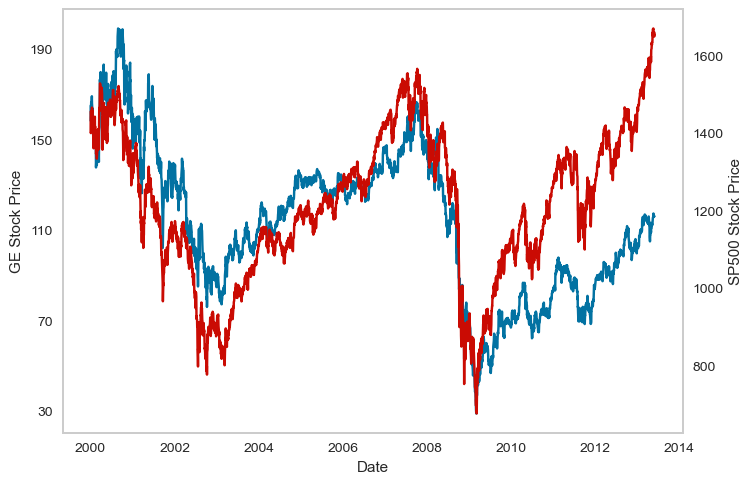

In [346]:
fig, ax = plt.subplots()
ax.plot(df_GE['Adj Close'].index, df_GE['Adj Close'])
ax.set_xlabel('Date')
ax.set_ylabel('GE Stock Price')
ax.set_yticks([i for i in range(np.int(np.round(df_GE['Adj Close'].min(),-1)), np.int(np.round(df_GE['Adj Close'].max(),-1)),40)])
ax.grid(False)
ax2 = ax.twinx()
ax2.plot(df_SP500['Adj Close'].index, df_SP500['Adj Close'],'r')
ax2.set_ylabel('SP500 Stock Price')
ax2.grid(False)
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1],len(ax.get_yticks())))

Even with visual inspection, we can see that GE stock price is following the same trend as SP500 stock price. 

Text(0.5, 1.0, '3-Month Treasury Rate (Constant Maturity)')

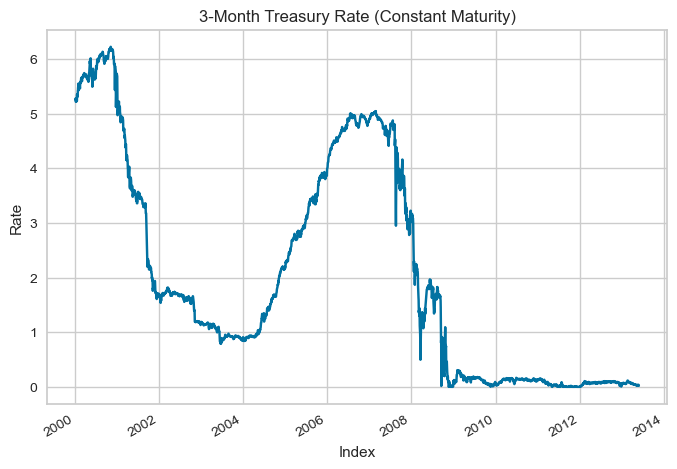

In [347]:
df_Treasury['Adj Close'].plot()
plt.ylabel('Rate')
plt.xlabel('Index')
plt.title('3-Month Treasury Rate (Constant Maturity)')

Now we construct the variables with the log daily returns of GE and the SP500 index as well as the risk-free asset returns. Calculating the daily return for T-bills is rather complex. Look here for a refresher: https://quant.stackexchange.com/questions/33076/how-to-calculate-daily-risk-free-rate-using-13-week-treasury-bill

In [348]:
df_GE['returns'] = (np.log(df_GE['Adj Close'])).diff()
df_SP500['returns'] = (np.log(df_SP500['Adj Close'])).diff()
df_Treasury['returns'] = np.log(1+ df_Treasury['Adj Close']/36000) 

We are interested in excess return. That is the return above the Treasury bill returns. It is this return that will justify the risk we are exposing ourselves to in the stock market. 

In [349]:
df_GE['excess_returns'] = df_GE.returns - df_Treasury.returns
df_SP500['excess_returns'] = df_SP500.returns - df_Treasury.returns

Now let's visualize the data points for which we want to find a linear function

Text(0, 0.5, 'GE Excess Returns')

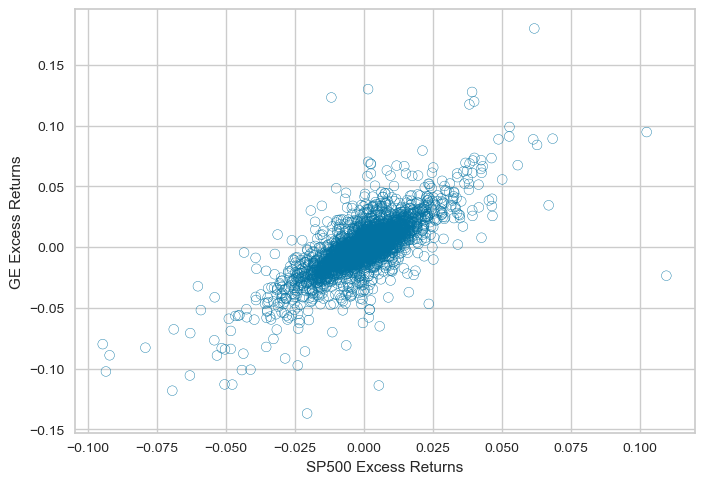

In [350]:
plt.scatter(df_SP500['excess_returns'], df_GE['excess_returns'], facecolors = 'none', edgecolors = 'b')
plt.xlabel('SP500 Excess Returns')
plt.ylabel('GE Excess Returns')

There is clearly a positive correlation between GE's excess returns and the SP500's. Let us now examine this relation quantitatively using an OLS regression model.

### [3. Fitting the linear regression for CAPM](#t-o-c)  <a class="anchor" id="fit-reg"></a>

In [202]:
import statsmodels.api as sm

In [403]:
df_SP500.dropna(inplace = True)
df_GE.dropna(inplace = True)
reg_GE= sm.OLS((df_SP500['excess_returns']).values.reshape(-1,1), df_GE['excess_returns'].values.reshape(-1,1)).fit() #reshaping as the linear regression model requires arrays
print(reg_GE.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.568
Model:                            OLS   Adj. R-squared (uncentered):              0.568
Method:                 Least Squares   F-statistic:                              4424.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                        13:57:41   Log-Likelihood:                          11161.
No. Observations:                3366   AIC:                                 -2.232e+04
Df Residuals:                    3365   BIC:                                 -2.231e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### [3.1 Interpreting the OLS Regression Results:](#t-o-c) <a class="anchor" id="int-res"></a>


The coefficient (0.4795) shows that there is a positive correlation between GE excess returns and SP500's. The R2 suggests that 52% of the variation in GE excess returns is explained by SP500's excess returns. 

* t-test - appropriate to test if the parameter differs from 0 or if it is positive or negative
* F-test (ANOVA) - only appropriate for testing that a parameter differs from 0

* **t-test**: shows that the results are statistically significant and there is a positive relationationship between GE and SP500. As SP500 price goes up, so does the price of GE.
<br>
* **Omnibus**: Omnibus describes the normalcy of the residuals. A 0 would indicate perfect normalcy. The value obtained for our model shows that the residuals are not perfectly normal <br> 
* **Durbin-watson**: is a measure of homoscedasticity (constant variance of errors/residuals). Ideal homoscedasticity will lie between 1 and 2. The obtained value shows the residuals may be heteroscedastic.
<br>
* **Cond. No.**: is a measurement of the sensitivity of the model as compared to the size of changes in the data it is analyizng. Multicollinearity is strongly implied by a high condition number. Multicollinearity is a term to describe two or more independant variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy. Since we have a single independant paramter, multicollinearity is not an issue. 


We now need to review the SLR assumptions: 
* The mean of the response, $E(Y_i)$, at each value of the predictor, $x_i$, is a Linear function of the $x_i$.
* The errors, $\epsilon_i$, are Independent.
* The errors, $\epsilon_i$, at each value of the predictor, $x_i$, are Normally distributed.
* The errors, $\epsilon_i$, at each value of the predictor, $x_i$, have Equal variances (denoted $\sigma^2$)

The impact of each of the above assumptions is ranked below by importance:
1. All tests and intervals are very sensitive to even minor departures from independence.
2. All tests and intervals are sensitive to moderate departures from equal variance.
3. The hypothesis tests and confidence intervals for $\beta_0$ and $\beta_1$ are fairly "robust" (that is, forgiving) against departures from normality.
4. Prediction intervals are quite sensitive to departures from normality.

The importance of departing from the assumptions depend on the desired outcome of using a regression model. Testing a relationship between the dependant variable and the predictor may be resilient to departure from the normality assumption. However, predicting futur values of the dependent variable may be inaccurate when the normality assumption is violated. 

The OLS regression results suggest that our assumptions regarding the normalcy of the residuals and their constant variance may be flawed. <font color = red> **Let's start investigating.** </font>

### [3.2 Undertaking Regression Diagnostics](#t-o-c) <a class="anchor" id="int-res"></a>


Let's start with 'residuals versus fit plot'. It is used to detect non-linearity, unequal error variances and outliers. To evaluate our assumptions, we plot the data and look at the followin:
* Are the residuals distributed randomly around the 0 line (mean of residuals). If it does not then the linearity assumption is questionable
* Do the residuals form a horizontal band around the 0 line. If it does, then the residuals variance is constant
* Any residuals stand out. If yes, then outliers may exist. 

**Interpreting the 'residuals versus fit plot' (EXAMPLES)**
* adding a predictor to the model: If the plot of a certain independent variable (predictor) against the fitted values shows a non random pattern (increasing or decreasing), then the predictor may be explaining some of the variablity in the response. It may mean that the existing model is missing the mentioned predictor and it should be added to test its impact on the regression results.   
![title](https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/04slrmodel/regress_BP_Age_resid01/index.png)

* non-linearity: if the plot shows a parabolic pattern, then there is a non-linear relationship between the response and the predictor that needs to be modeled. 
![title](https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/04slrmodel/regress_groove_mileage_rf/index.png)
* non constant error variance: 
    * fanning effect: small for small x and larger for large x <br>
    ![title](https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/04slrmodel/regress_alpha_pluto_rf/index.png)

    * funneling effect: large for small x and smaller for larger x
    * varies in a complex fashion

Back to our data!

In [353]:
df_excess_returns = pd.concat([df_SP500.excess_returns, df_GE.excess_returns], axis = 1)
df_excess_returns.columns = ['SP500','GE']


In [405]:
reg_GE_fitted_y = reg_GE.fittedvalues
reg_GE_residuals = reg_GE.resid
reg_GE_norm_residuals = reg_GE.get_influence().resid_studentized_internal
reg_GE_norm_residuals_abs_sqrt = np.sqrt(np.abs(reg_GE_norm_residuals))
reg_GE_leverage = reg_GE.get_influence().hat_matrix_diag
reg_GE_cooks  = reg_GE.get_influence().cooks_distance[0]

c:\Users\basha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

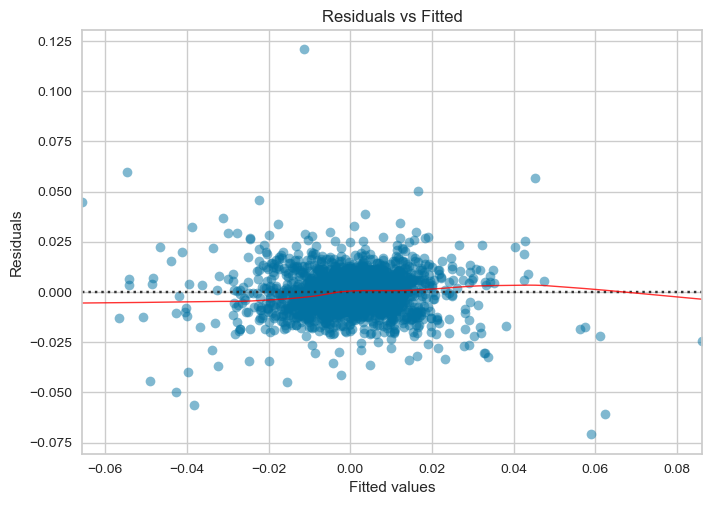

In [406]:
import seaborn as sns
plt_lm_1 = plt.figure()
plt_lm_1.axes[0] = sns.residplot(reg_GE_fitted_y, reg_GE_residuals, lowess = True, scatter_kws = {'alpha':0.5}, line_kws = {'color' : 
'red', 'lw': 1, 'alpha': 0.8})
plt_lm_1.axes[0].set_title('Residuals vs Fitted')
plt_lm_1.axes[0].set_xlabel('Fitted values')
plt_lm_1.axes[0].set_ylabel('Residuals')

The distribution looks random. I can see a potential for outliers and high leverage points. However, i cannot spot a sign of non-linearity or non-constant variance. 

**Interpreting the 'residuals versus order plot' [EXAMPLES]** <br>
Detects serial correlation in the error terms (a form of non-independence). If data is a sequence, this plot allows to identify any correlation between the error terms that are near each other in the sequence. The plot is only relevant if you know the order in which the data was collected. When a trend is observed, then other predictors should be included in the model. Example, the figure below shows a variation in the response due to time, so the 'time' predictor should be included in the model:

![title](https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/04slrmodel/residualtime2/index.jpg) <br>

In case of a positive or negative serial correlation (see images below), it is better to exit the realm of regression and into that of time series modelling. 

![title](https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/04slrmodel/residualtime3/index.jpg) <br>

![title](https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/04slrmodel/neg_serial_correlation_plot/index.gif) <br>



Back to our DATA!

In [208]:
order = [i for i in range(0,len(df_excess_returns.index.values))]

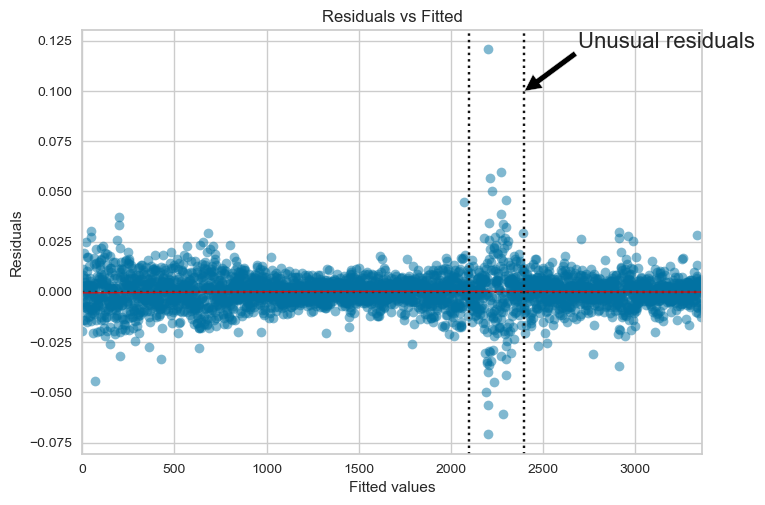

In [280]:

plt_lm_1 = plt.figure()
plt_lm_1.axes[0] = sns.residplot(order, reg_GE_residuals, lowess = True, scatter_kws = {'alpha':0.5}, line_kws = {'color' : 
'red', 'lw': 1, 'alpha': 0.8})
plt_lm_1.axes[0].set_title('Residuals vs Fitted')
plt_lm_1.axes[0].set_xlabel('Fitted values')
plt_lm_1.axes[0].set_ylabel('Residuals')
plt.axvline(2100, ymin = -1, ymax = 1, color = 'k', linestyle = ':')
plt.axvline(2400, ymin = -1, ymax = 1, color = 'k', linestyle = ':')
plt_lm_1.axes[0].annotate('Unusual residuals', xy = (2400,0.1), xycoords = 'data', 
                            xytext = (0.8, 0.95), textcoords = 'axes fraction', 
                            arrowprops = dict(facecolor = 'black', shrink = 10),
                            fontsize = 16, horizontalalignment = 'left', verticalalignment = 'bottom')
plt.show()

Overall the distribution seems to be random around the 0 line excpet for few potential outliers above the -0.05 and + 0.05 horizontal bands. 

In [377]:
'The unusual residuals correspond to a period approximately between {} and {}'.format(df_GE.index[2100].date(), df_GE.index[2400].date())

'The unusual residuals correspond to a period approximately between 2008-05-19 and 2009-07-28'

**Interpreting the 'normal probability plot of residuals'** : <br> 
Tests if the residuals are normall distributed.


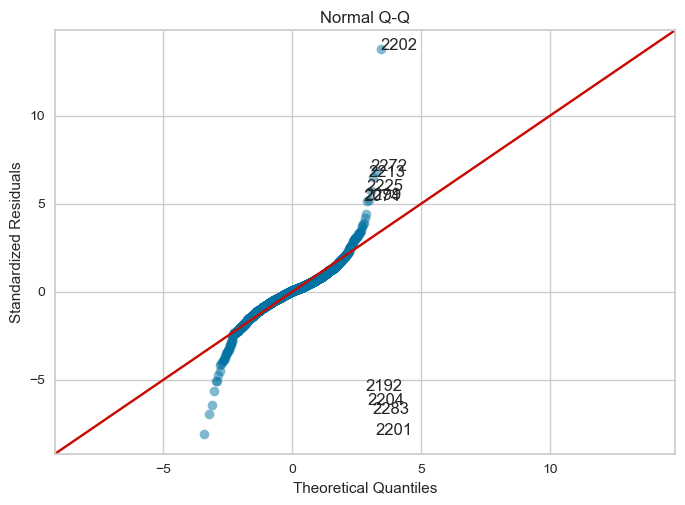

In [385]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(reg_GE_norm_residuals)

plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(reg_GE_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:10]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   reg_GE_norm_residuals[i]));

There are too many extreme positive and negative residuals. The distribution is heavy tailed. This suggests that the error terms are not normally distributed.

**Interpreting the 'scale location' plot** : <br>
Allows to identify non-constant variance, aka heteroscedasticity. 

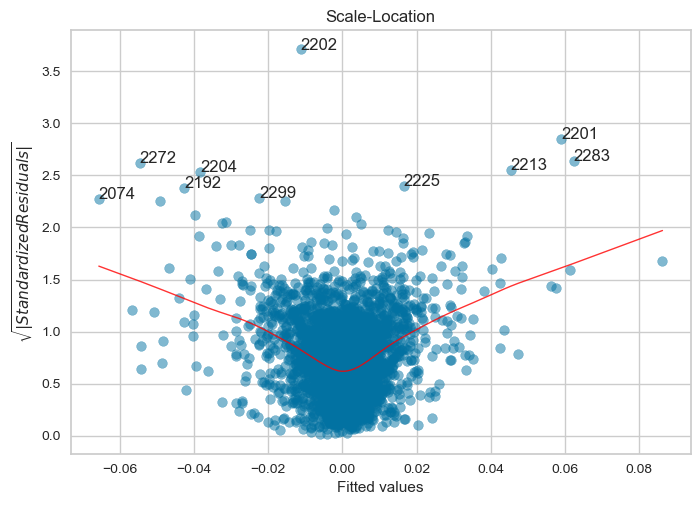

In [386]:
plot_lm_3 = plt.figure()
plt.scatter(reg_GE_fitted_y, reg_GE_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(reg_GE_fitted_y, reg_GE_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# annotations
abs_sq_norm_resid = np.flip(np.argsort(reg_GE_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:10]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                                xy=(reg_GE_fitted_y[i],
                                    reg_GE_norm_residuals_abs_sqrt[i]))

Given the V shape of the red line, the data could be heteroscedastic. However, given that the 'residuals vas fitted values plot' did not show signs of non-constant variance, and the non-normal signs that the other plots showed, the problem could be outliers and leverage points. It is worth investigating resolving outliers and leverage points first before non-constant variance. 

**Interpreting the 'residuals vs leverage' plot** : <br> 
This plot identifies leverage points. Leverage points are data points with extreme x-values (outliers are data points with extreme y-values). Regression parameters are senstive to leverage points. 

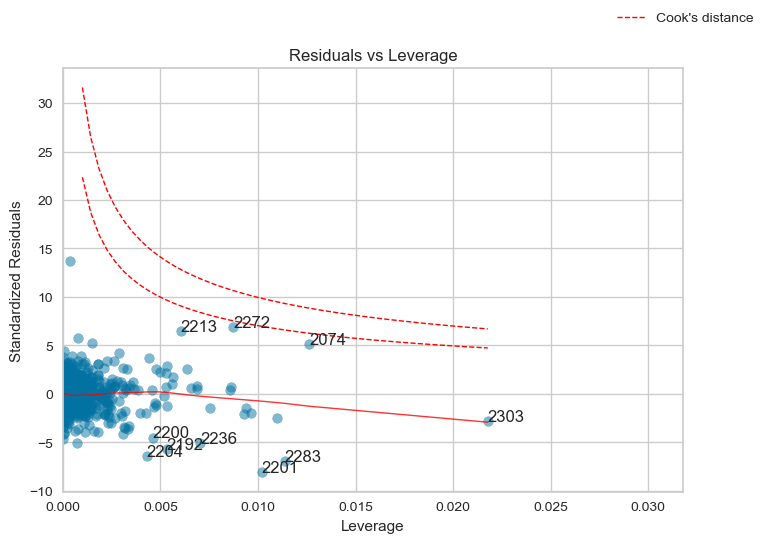

In [387]:
plot_lm_4 = plt.figure();
plt.scatter(reg_GE_leverage, reg_GE_norm_residuals, alpha=0.5)
sns.regplot(reg_GE_leverage, reg_GE_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, max(reg_GE_leverage)+0.01)
# plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(reg_GE_cooks), 0)[:10]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                xy=(reg_GE_leverage[i],
                                    reg_GE_norm_residuals[i]))


def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
    
p = len(reg_GE.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
    np.linspace(0.001, max(reg_GE_leverage), 50),
    'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
    np.linspace(0.001, max(reg_GE_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

In [367]:
date1 = df_GE.index[2000]

In [371]:
c = date1.date()

**Conclusions**
* QQ-plot: heavy tails due to extreme positive and negative values. Residual distribution is not normal. 
* Residuals versus order plot: residual values were unusual in the period between 2008-05-19 and 2009-07-28
* Scale location: Gave signals of heteroscedasticity. However, given that the 'residuals vas fitted values plot' did not show signs of non-constant variance, and the non-normal signs that the other plots showed, the problem could be outliers and leverage points. It is worth investigating resolving outliers and leverage points first before non-constant variance. 
* Residuals vs leverage: only one data point got close to being a high influential point. 


Given the above result, I will first investigate removing potential outliers and high leverage points and test the effect on the OLS Regression results. 

## 4. Dealing with outliers and high leverage points

We want to:
* Detect outliers (extreme y values) using standardized residuals and studentized residuals
* Detect extreme x values using leverages
* Detect potentially influential data points using DFFITS and Cook's distance. High leverage data points and outliers may or may not be influential - it needs investigation. 
<br>


If you have influential data points, you can:
1) do nothing because there is theoretical reasons to include them,
2) drop them, or
3) include them with reduced weight using robust regression.

I will first start by removing data points that were signaled as potential outliers and/or high leverage points in the previous section. These points have indices 2202, 2283, 2201 and 2272

In [404]:
df_GE_1 = df_GE.copy()
df_SP500_1 = df_SP500.copy()

pot_out_lev = [2202,2283,2201,2272]
df_GE_1.drop(index = df_GE_1.index[pot_out_lev], inplace = True)
df_SP500_1.drop(index = df_SP500_1.index[pot_out_lev], inplace = True)

reg_GE_2 = sm.OLS(df_SP500_1['excess_returns'].values.reshape(-1,1),df_GE_1['excess_returns'].values.reshape(-1,1)).fit()

print(reg_GE_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.606
Model:                            OLS   Adj. R-squared (uncentered):              0.605
Method:                 Least Squares   F-statistic:                              5160.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                        13:57:58   Log-Likelihood:                          11333.
No. Observations:                3362   AIC:                                 -2.266e+04
Df Residuals:                    3361   BIC:                                 -2.266e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Let us try removing more points that were highlighted in the previous section

In [399]:
df_GE_2 = df_GE.copy()
df_SP500_2 = df_SP500.copy()
pot_out_lev_2 = [2202,2283,2201,2272, 2074, 2213,2225,2299,2192,2204,2303,2200,2236]
df_GE_2.drop(index = df_GE_2.index[pot_out_lev_2], inplace = True)
df_SP500_2.drop(index = df_SP500_2.index[pot_out_lev_2], inplace = True)

reg_GE_2 = sm.OLS(df_SP500_2['excess_returns'].values.reshape(-1,1),df_GE_2['excess_returns'].values.reshape(-1,1)).fit()

print(reg_GE_2.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.603
Model:                            OLS   Adj. R-squared (uncentered):              0.603
Method:                 Least Squares   F-statistic:                              5098.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                        13:49:24   Log-Likelihood:                          11444.
No. Observations:                3353   AIC:                                 -2.289e+04
Df Residuals:                    3352   BIC:                                 -2.288e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [401]:
reg_GE.params

array([0.47950315])

In [402]:
df_reg_comparisons = pd.DataFrame(columns = ['Coef','R2', 'AIC', 'BIC'], index = ['All data', 'Outliers&HighLev removed', 'Further Outliers&HighLev removed', 'influential - DFFITS'])

df_reg_comparisons.loc['All data'] = [reg_GE.params[0], reg_GE.rsquared,reg_GE.aic,reg_GE.bic]
df_reg_comparisons.loc['Outliers&HighLev removed'] = [reg_GE_2.params[0],reg_GE_2.rsquared,reg_GE_2.aic,reg_GE_1.bic]
df_reg_comparisons.loc['Further Outliers&HighLev removed'] = [reg_GE_2.params[0],reg_GE_2.rsquared,reg_GE_2.aic,reg_GE_2.bic]
# df_reg_comparisons.loc['influential - DFFITS'] = [reg_GE_3.rsquared,reg_GE_3.aic,reg_GE_3.bic]
display(df_reg_comparisons)

,Coef,R2,AIC,BIC
All data,0.479503,0.56798,-22320.040453,-22313.918972
Outliers&HighLev removed,0.497761,0.605557,-22664.227161,-22658.10687
Further Outliers&HighLev removed,0.490755,0.6033,-22886.876244,-22880.758634
influential - DFFITS,NaN,NaN,NaN,NaN


By removing 4 outliers/leverage data points we increase R2 by c.a 4% and reduced the AIC and BIC. Removing further data points did not enhance the results significantly. 

Let us undertake the diagnostics with the new regression model (with 4 outliers removed)

In [448]:
reg_GE_1_fitted_y = reg_GE_1.fittedvalues
reg_GE_1_residuals = reg_GE_1.resid
reg_GE_1_norm_residuals = reg_GE_1.get_influence().resid_studentized_internal
reg_GE_1_norm_residuals_abs_sqrt = np.sqrt(np.abs(reg_GE_1_norm_residuals))
reg_GE_1_leverage = reg_GE_1.get_influence().hat_matrix_diag
reg_GE_1_cooks  = reg_GE_1.get_influence().cooks_distance[0]

In [449]:
reg_GE_2_fitted_y = reg_GE_2.fittedvalues
reg_GE_2_residuals = reg_GE_2.resid
reg_GE_2_norm_residuals = reg_GE_2.get_influence().resid_studentized_internal
reg_GE_2_norm_residuals_abs_sqrt = np.sqrt(np.abs(reg_GE_2_norm_residuals))
reg_GE_2_leverage = reg_GE_2.get_influence().hat_matrix_diag
reg_GE_2_cooks  = reg_GE_2.get_influence().cooks_distance[0]

In [451]:
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
style_talk = 'seaborn-talk' 

In [457]:
# base code
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table



        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

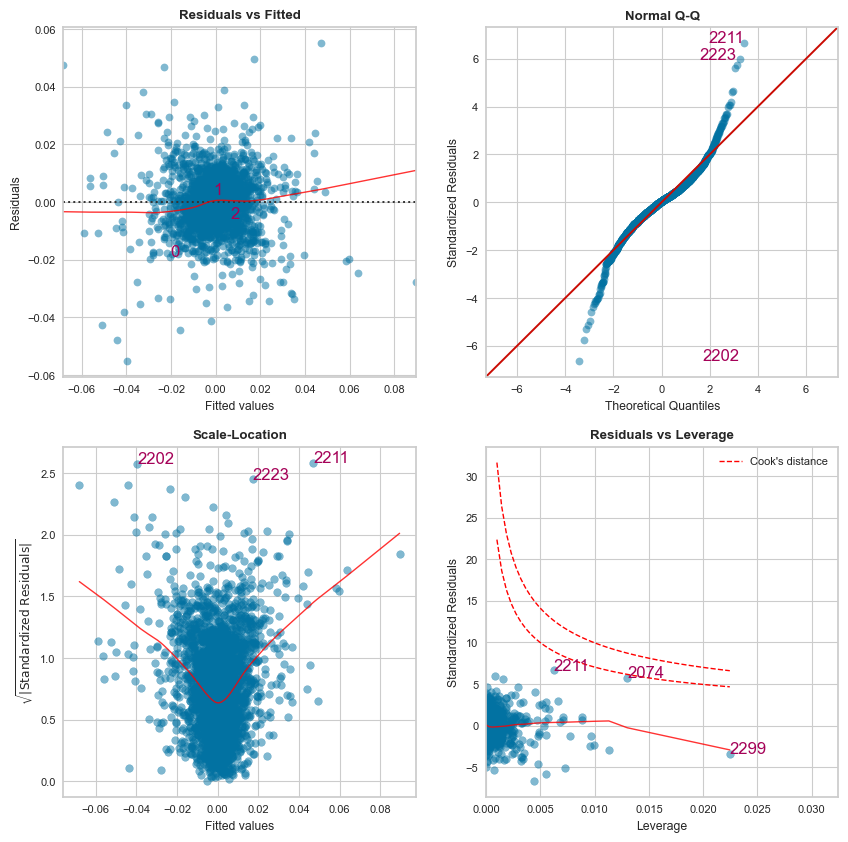

In [460]:
cls = Linear_Reg_Diagnostic(reg_GE_1)
fig, ax = cls()

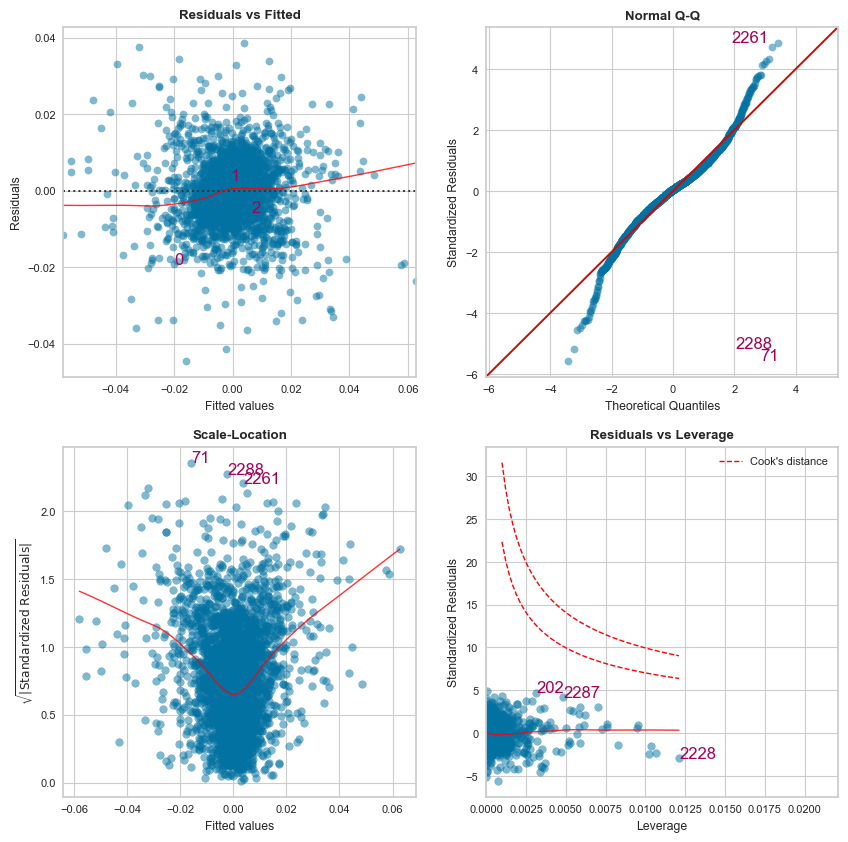

In [461]:
cls = Linear_Reg_Diagnostic(reg_GE_2)
fig, ax = cls()

Though the model was improved (in terms of R2, AIC and BIC), the issued identified in the intial diagnostic persist. A more robust method is required.